# Import Libraries

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Load Dataset

In [24]:
try:
    # fetch dataset from repo
    adult = fetch_ucirepo(id=2)
    
except Exception as e:
    # fetch dataset from csv file
    adult = pd.read_csv('datasets/adult.csv', header=True)

X = adult.data.features 
y = adult.data.targets 

# create dataframe
df = pd.concat([X, y], axis=1)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# EDA

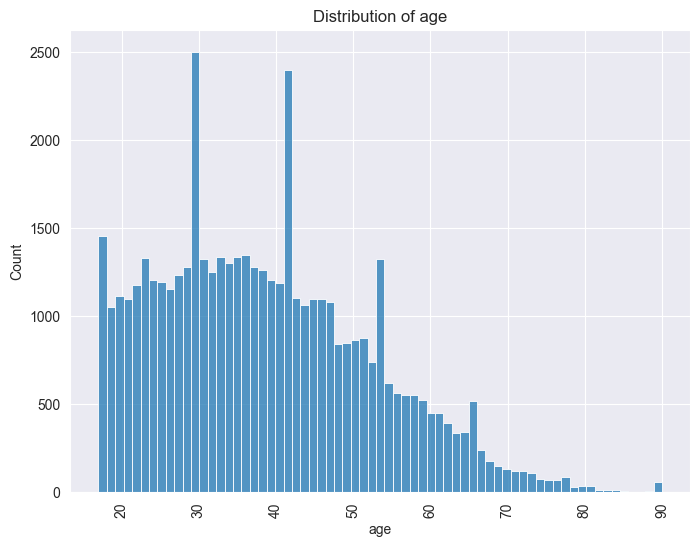

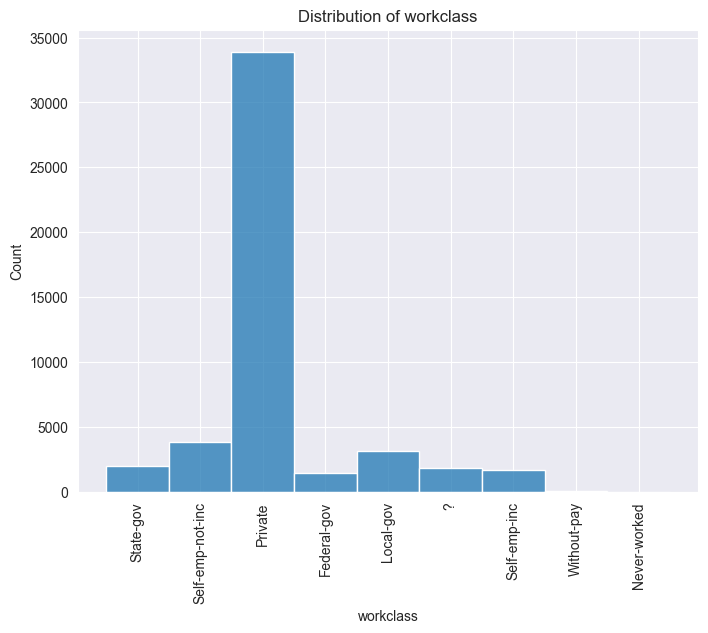

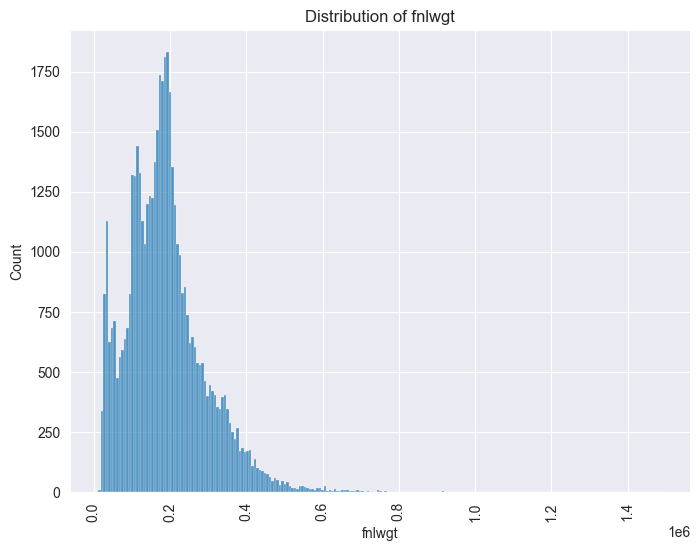

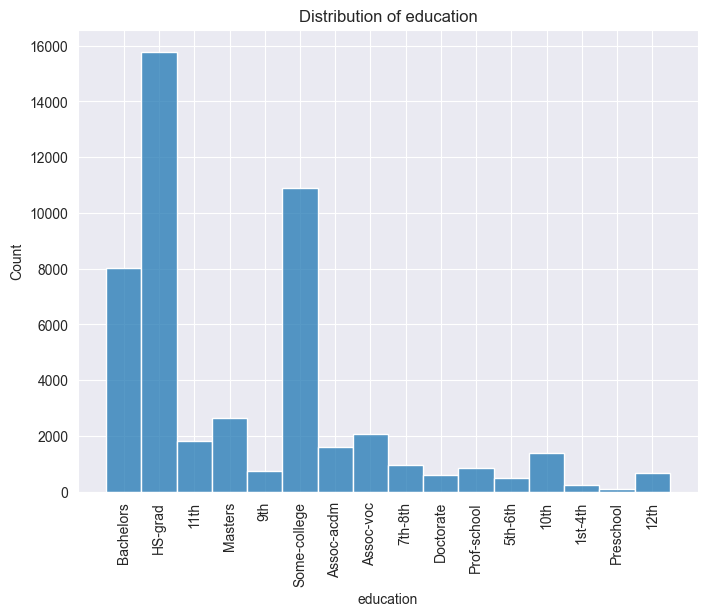

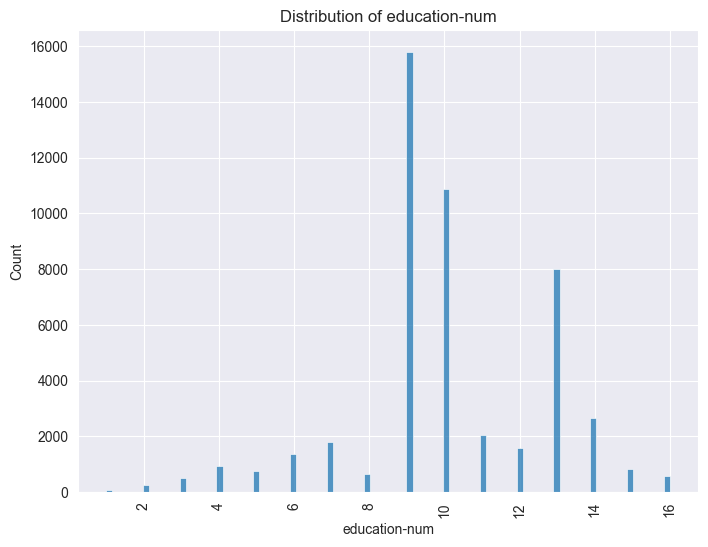

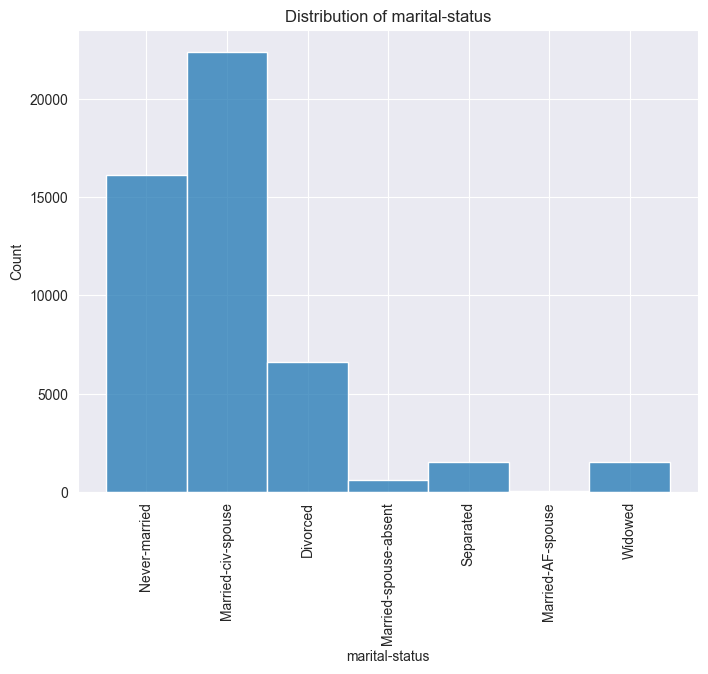

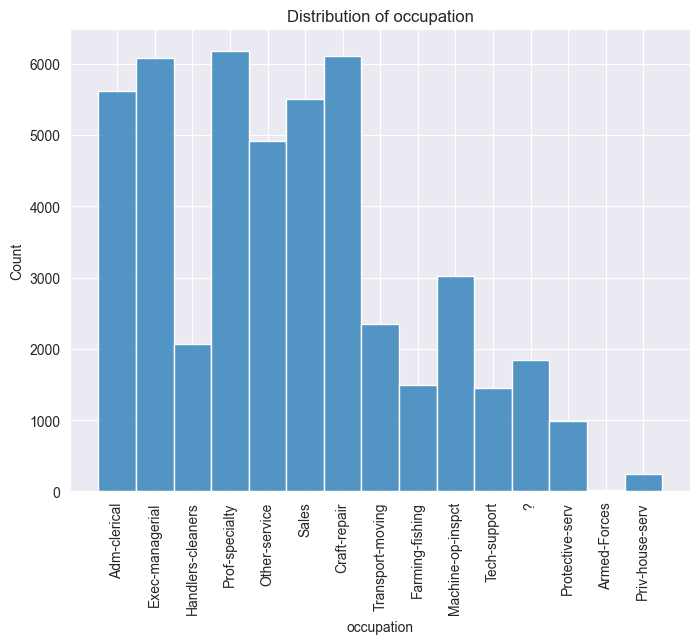

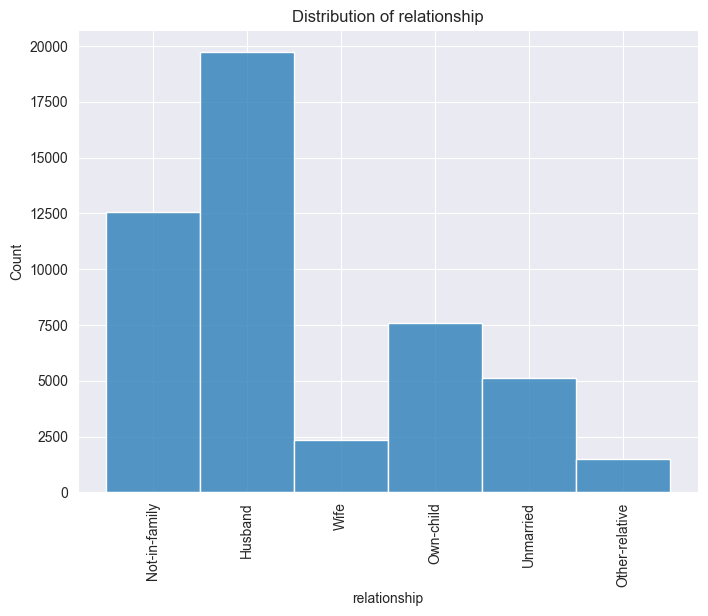

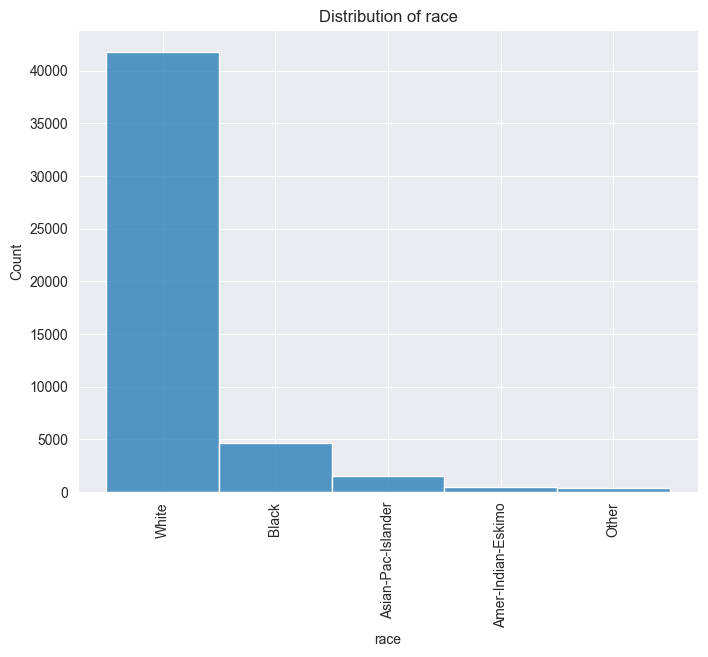

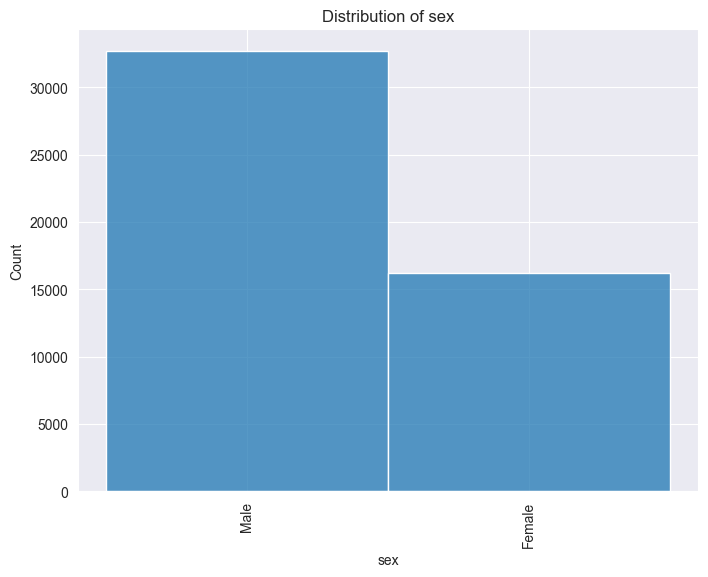

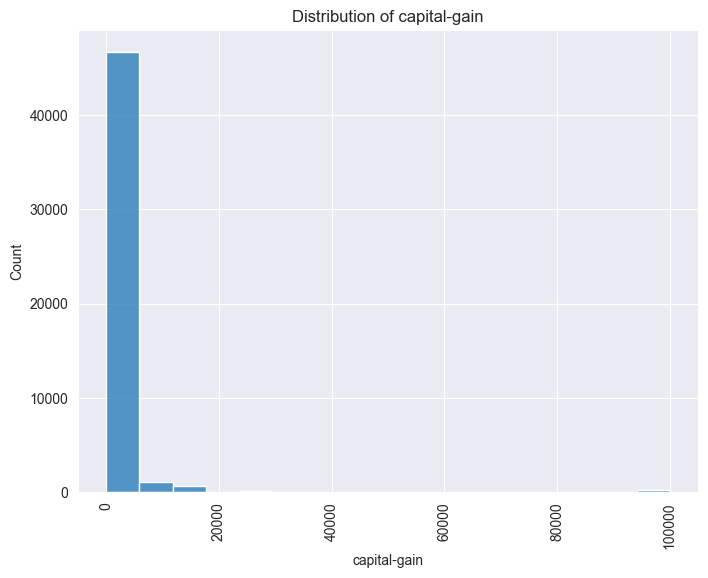

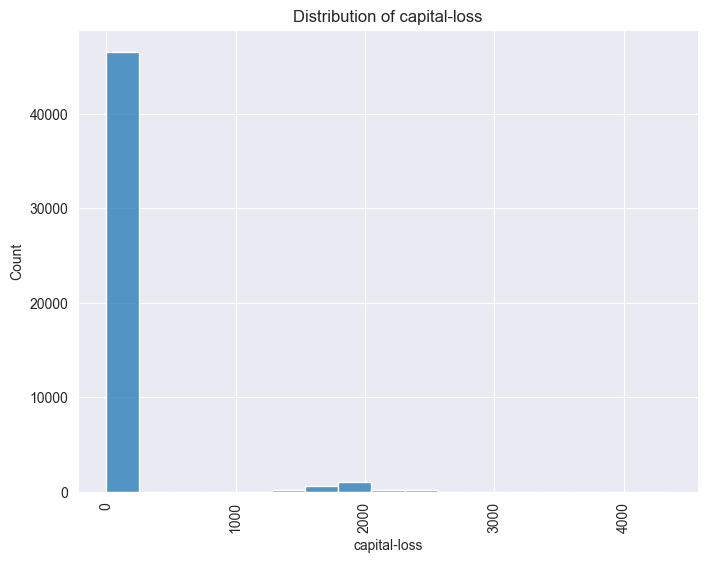

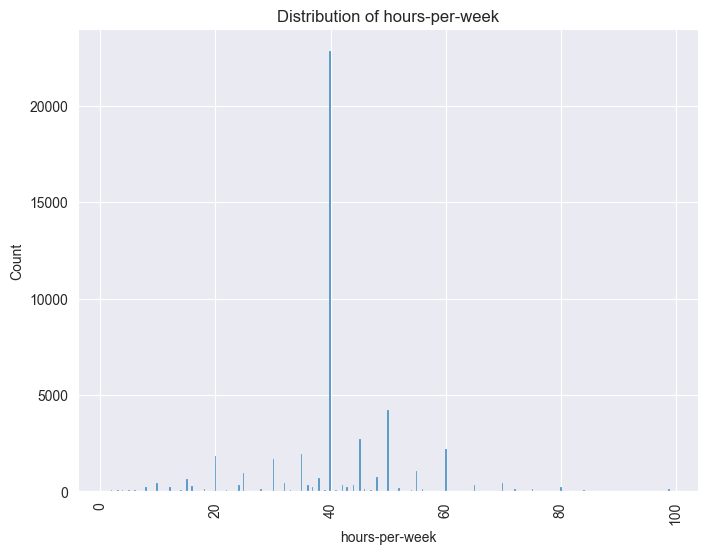

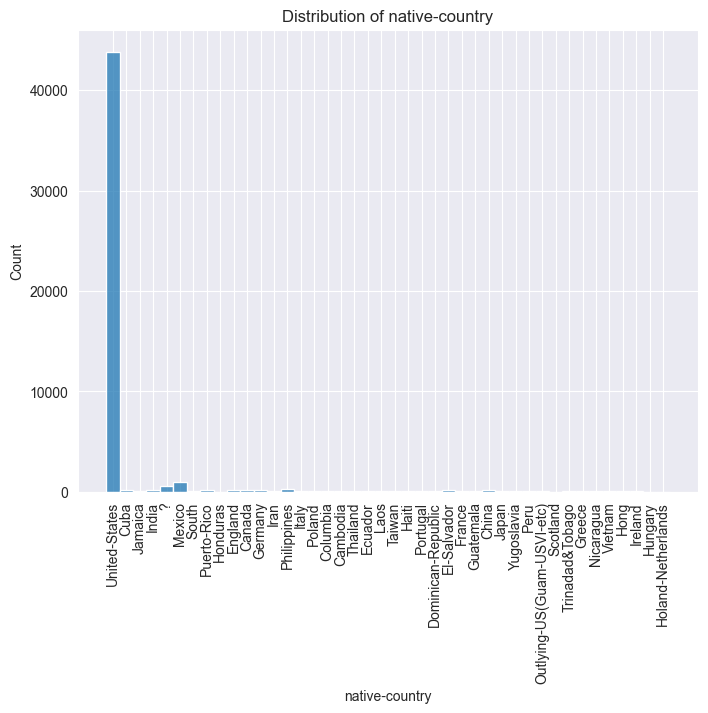

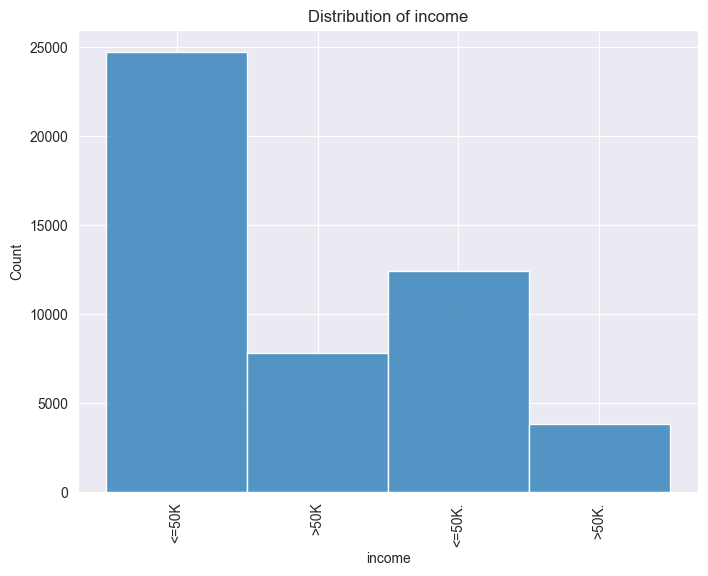

In [27]:
for feature in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Preprocess

#### Drop Unwanted Columns

In [28]:
# Drop column
df = df.drop(['fnlwgt', 'education'],axis = 1)

#### Replace ? with NaN and Drop NaN and Duplicates

In [29]:
# replace ? with NaN
df.replace('?', np.NaN, inplace=True)
df.dropna(inplace=True)

# drop duplicates
df = df.drop_duplicates()
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Remove '.' from incomes ('<=50K.' -> '<=50K') & ('>50K.' -> '>50K')

In [30]:
# name labels correctly
df['income'].replace('<=50K.', '<=50K', inplace=True)
df['income'].replace('>50K.', '>50K', inplace=True)

#### Label Encoding

In [31]:
#initialize label encoder
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

# encode values in each column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,13,2,3,0,4,1,0,0,13,38,0
2,38,2,9,0,5,1,4,1,0,0,40,38,0
3,53,2,7,2,5,0,2,1,0,0,40,38,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0


# EDA

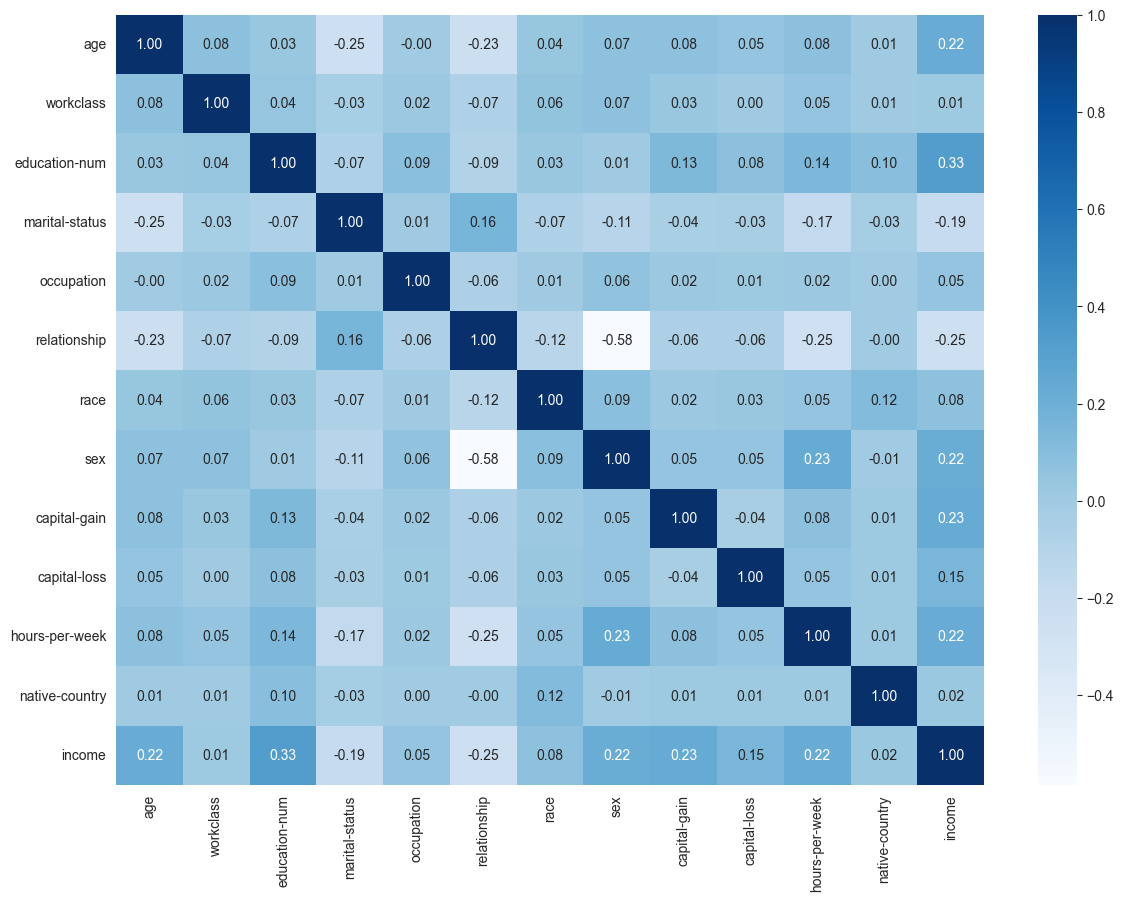

In [32]:
# correlation using heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

# Train Test Split

In [33]:
# define x, y labels
X = df.drop(columns=['income'])
y = df['income']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32827, 12)
X_test shape: (8207, 12)
y_train shape: (32827,)
y_test shape: (8207,)


# Naive bayes model

#### Train naive bayes model

In [34]:
# initialize GaussianNB model
gnb = GaussianNB(priors=[0.3, 0.7])

# train model
gnb.fit(X_train, y_train)

# make predictions
gnb_predictions = gnb.predict(X_test)

#### Grid search

In [35]:
# priors_to_try = [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3], [0.8, 0.2], [0.2, 0.8]]
# 
# # initialize GaussianNB
# gnb = GaussianNB()
# 
# # define the parameter grid with priors
# param_grid = {'priors': priors_to_try}
# 
# # initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
# 
# # perform grid search
# grid_search.fit(X_train, y_train)
# 
# # get the best priors and model
# best_priors = grid_search.best_params_['priors']
# best_accuracy = grid_search.best_score_
# best_model = grid_search.best_estimator_
# 
# print("Best Prior:", best_priors)
# print("Best Accuracy:", best_accuracy)

Best Prior: [0.3, 0.7]
Best Accuracy: 0.8189169822909202

#### Test naive bayes model

In [36]:
# calculate model accuracy
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Accuracy Score for Gaussian Naive Bayes:", gnb_accuracy , '\n')

# create classification report
gnb_classification_report = classification_report(y_test, gnb_predictions)
print("Classification Report for Gaussian Naive Bayes:\n", gnb_classification_report)

Accuracy Score for Gaussian Naive Bayes: 0.8129645424637505 

Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      6154
           1       0.66      0.53      0.59      2053

    accuracy                           0.81      8207
   macro avg       0.75      0.72      0.73      8207
weighted avg       0.80      0.81      0.81      8207


Confusion Matrix for Gaussian Naive Bayes:


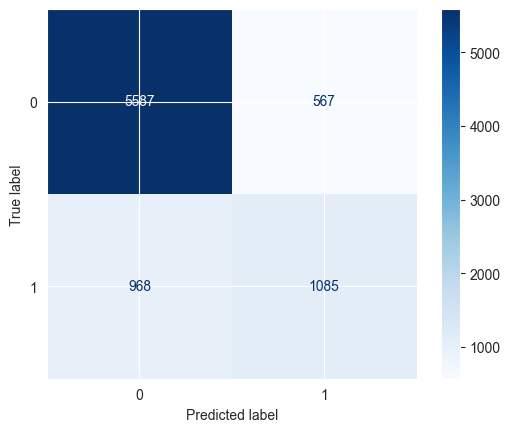

In [37]:
# create confusion matrix
print("Confusion Matrix for Gaussian Naive Bayes:\n")
ConfusionMatrixDisplay.from_predictions(y_test, gnb_predictions, cmap='Blues')
plt.show()

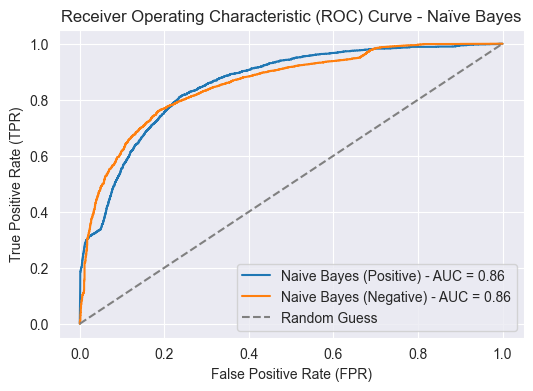

In [38]:
# calculate ROC
y_prob_gnb = gnb.predict_proba(X_test)

fpr_gnb_pos, tpr_gnb_pos, _ = roc_curve(y_test, y_prob_gnb[:, 1])
fpr_gnb_neg, tpr_gnb_neg, _ = roc_curve(1 - y_test, y_prob_gnb[:, 0])

roc_auc_gnb_pos = roc_auc_score(y_test, y_prob_gnb[:, 1])
roc_auc_gnb_neg = roc_auc_score(1 - y_test, y_prob_gnb[:, 0])

plt.figure(figsize=(6, 4))
plt.plot(fpr_gnb_pos, tpr_gnb_pos, label=f'Naive Bayes (Positive) - AUC = {roc_auc_gnb_pos:.2f}')
plt.plot(fpr_gnb_neg, tpr_gnb_neg, label=f'Naive Bayes (Negative) - AUC = {roc_auc_gnb_neg:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naïve Bayes')
plt.legend()
plt.grid(True)
plt.show()

# Random forest model

#### Train Random forest model

In [39]:
# initialize GaussianNB model
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=20,
                            min_samples_split=10,
                            min_samples_leaf=2,
                            random_state=42)

# train model
rf.fit(X_train, y_train)

# make predictions
rf_predictions = rf.predict(X_test)

#### Grid search

In [40]:
# # define the hyperparameter
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# 
# # initialize random forest classifier
# rf = RandomForestClassifier(random_state=42)
# 
# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
# 
# # Perform grid search
# grid_search.fit(X_train, y_train)
# 
# # Get the best hyperparameter
# best_hyperparameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_
# best_model = grid_search.best_estimator_
# 
# print("Best Hyperparameters:", best_hyperparameters)
# print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2}
Best Accuracy: 0.8675401781144436

#### Test Random Forest Model

In [41]:
# calculate model accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy Score for Random Forest:", rf_accuracy, '\n')

# create classification report
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report for Random Forest:\n", rf_classification_report)

Accuracy Score for Random Forest: 0.8602412574631412 

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6154
           1       0.77      0.62      0.69      2053

    accuracy                           0.86      8207
   macro avg       0.83      0.78      0.80      8207
weighted avg       0.85      0.86      0.85      8207


Confusion Matrix for Random Forest:


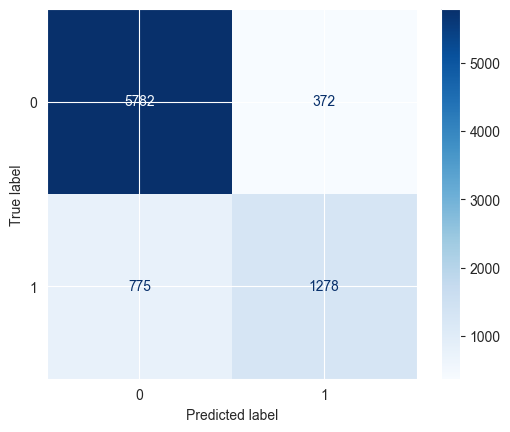

In [42]:
# create confusion matrix
print("Confusion Matrix for Random Forest:")
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions, cmap='Blues')
plt.show()

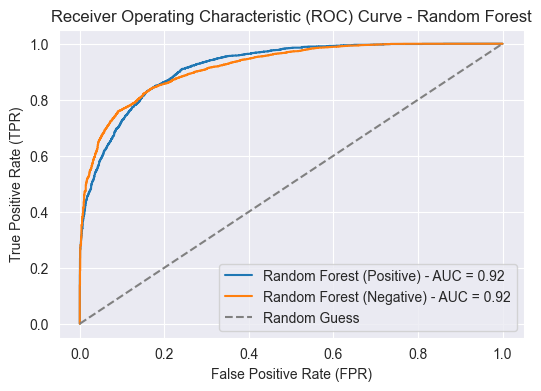

In [43]:
# calculate ROC
y_prob_rf = rf.predict_proba(X_test)

fpr_rf_pos, tpr_rf_pos, _ = roc_curve(y_test, y_prob_rf[:, 1])
fpr_rf_neg, tpr_rf_neg, _ = roc_curve(1 - y_test, y_prob_rf[:, 0])

roc_auc_rf_pos = roc_auc_score(y_test, y_prob_rf[:, 1])
roc_auc_rf_neg = roc_auc_score(1 - y_test, y_prob_rf[:, 0])

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf_pos, tpr_rf_pos, label=f'Random Forest (Positive) - AUC = {roc_auc_rf_pos:.2f}')
plt.plot(fpr_rf_neg, tpr_rf_neg, label=f'Random Forest (Negative) - AUC = {roc_auc_rf_neg:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()